# 4章　ニューラルネットワークの学習

## 0.はじめに

「学習」とは，訓練データから最適な重みパラメータの値を自動で学習することを指します．

学習の手順(P113より改良)

### ステップ1　モデルと損失関数の設定
$$
モデル\ \ ;\ \ f(x) = \omega_0 + \omega_1 x = \vec{^t w} \vec{x}
$$
$$
損失関数\ \ ;\ \ E(\omega_0 , \omega_1) = \frac{1}{2} \sum_i (y_i - t_i)^2 
$$

### ステップ2　ミニバッチの作成

訓練データからランダムに一部のデータを選び出す．選ばれたデータをミニバッチといい，そのミニバッチの損失関数の値を減らすことを目的とする．

### ステップ3　損失関数の勾配を計算しパラメータを更新
$$
更新式\ \ ;\ \ \vec{w}^{(\tau)} = \vec{w}^{(\tau - 1)} - \alpha \nabla_{\vec{w}} E
$$

### ステップ4　繰り返す

### ステップ5　テスト誤差を計算し考察

訓練誤差が小さい要因：モデルが悪い，データが悪い，データの整理が悪い，特徴量の抽出が悪い，etc

テスト誤差が小さい要因：過学習が起きている，etc


## 1.データから学習する

ディープラーニングの最大の特徴は，データから学習できる点にあります．



データをそのまま使って自動で学習します．（これをend-to-end学習などといいます）

### 訓練データとテストデータ

機械学習の目的は，未知のデータに対してある推論をすることにあります．

そのためには，今あるデータ（訓練データ）だけに対してフィットするモデル（訓練誤差が小さいモデル）を作るだけでは不十分で，データが生成される母集団全体に対する誤差（汎化誤差）を小さくするモデルでないといけません．しかし，この汎化誤差を正確にもとめることは現実には不可能です．そこで，訓練データとは別のテストデータを用意して誤差（テスト誤差）を計算し，汎化誤差の近似とすることでその誤差を小さくします．

以上のことを実現するために，与えられたデータはランダムに訓練データとテストデータに分けて誤差を計算する必要があります．

## 2.準備

### カレントディレクトリを確認しましょう
カレントディレクトリの取得，変更，移動について

https://note.nkmk.me/python-os-getcwd-chdir/

In [1]:
# coding: utf-8
import os
path = os.getcwd() # 現在のカレントディレクトリを確認
print(path)

C:\Users\h20s1\OneDrive\ドキュメント\hirosaki-u-2022\morizemi\Zero_ML_4


### カレントディレクトリの中身を確認しましょう
指定したディレクトリの中身を確認する方法について

https://note.nkmk.me/python-listdir-isfile-isdir/

最低限ダウンロードしておくべきファイル

mnist.py # mnsitデータを取得するため

functions.py # softmaxなどの関数を使用するため

gradient.py # パラメータ更新の際に用いるため

In [2]:
os.listdir(path)

['.ipynb_checkpoints',
 'Chapter4_Zero.ipynb',
 'functions.py',
 'gradient.py',
 'mnist.pkl',
 'mnist.py',
 'sample_weight.pkl',
 'simplenet.png',
 't10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 'Twonet.png',
 '__pycache__',
 'ゼロつく３章.ipynb']

### ダウンロードされているライブラリを確認しましょう

In [3]:
! pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.4.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

### 必要になるライブラリ

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn  
from PIL import Image # PIL(Python Image Library)モジュールを用いて画像を出力

scikit-learn                  1.0.2
scikit-learn-intelex          2021.20220215.102710
scipy                         1.7.3
Scrapy                        2.6.1
seaborn                       0.11.2
Send2Trash                    1.8.0
service-identity              18.1.0
setuptools                    61.2.0
sip                           4.19.13
six                           1.16.0
smart-open                    5.1.0
sniffio                       1.2.0
snowballstemmer               2.2.0
sortedcollections             2.1.0
sortedcontainers              2.4.0
soupsieve                     2.3.1
Sphinx                        4.4.0
sphinxcontrib-applehelp       1.0.2
sphinxcontrib-devhelp         1.0.2
sphinxcontrib-htmlhelp        2.0.0
sphinxcontrib-jsmath          1.0.1
sphinxcontrib-qthelp          1.0.3
sphinxcontrib-serializinghtml 1.1.5
spyder                        5.1.5
spyder-kernels                2.1.3
SQLAlchemy                    1.4.32
stack-data                    0.2.0
statsm

### MNISTデータを取得

3.6の復習としてMNISTデータを取得しておきましょう．

In [5]:
from mnist import load_mnist # mnist.py から load_mnist関数を呼び出す

In [6]:
(x_train , t_train) , (x_test , t_test) = load_mnist(flatten = True , normalize = False)

In [7]:
# 取得したデータの確認
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


PLTで画像出力

https://imagingsolution.net/program/python/pillow/image_file_open_save/
    
matplotlibを用いてNumpyオブジェクトを出力

https://qiita.com/Tatejimaru137/items/44646c9bb3799768fa81

5
(784,)
(28, 28)


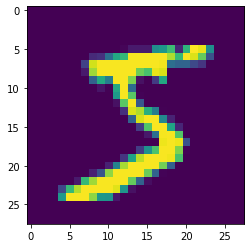

In [8]:
# 取得したデータの入力を少し確認:改良
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) # PIL用のデータオブジェクトに変換
    plt.imshow(np.array(img)) # 改良 <=　なぜか出力されなかったため

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形　<=データ取得の際に1次元配列にしているため
print(img.shape)  # (28, 28)

img_show(img)

4
(784,)
(28, 28)


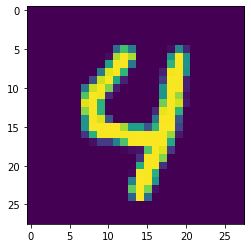

In [9]:
img = x_train[564]
label = t_train[564]
print(label)  

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形　<=データ取得の際に1次元配列にしているため
print(img.shape)  # (28, 28)

img_show(img)

1
(784,)
(28, 28)


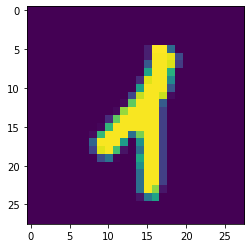

In [10]:
img = x_train[3644]
label = t_train[3644]
print(label)  

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 形状を元の画像サイズに変形　<=データ取得の際に1次元配列にしているため
print(img.shape)  # (28, 28)

img_show(img)

## 3.損失関数

### 2乗和誤差
回帰分析に用いられます．
$$
E(\vec{\omega}) = \frac{1}{2} \sum_i (y_i - t_i)^2
$$

In [11]:
def sum_squared_error(y,t):
    return 0.5 * np.sum((y - t)**2)

### 交差エントロピー誤差
多クラス分類に用いられます．
$$
E(\vec{\omega}) = - \sum_i t_i \log{y_i} 
$$

In [12]:
def cross_entropy_error(y,t):
    delta = 1e-7 # logに0をいれることをふせぐため
    return -np.sum(t * np.log(y + delta))

## 4.ミニバッチ学習
訓練データを何通りかに分割し，それぞれで損失関数を計算した後，各ミニバッチで計算した損失関数を用いて平均を取ります．

$$
E(\vec{\omega}) = - \frac{1}{N} \sum_n \sum_i t_{ni} \log{y_{ni}} 
$$

以上の例では，各データの損失関数を求めて，最後に全訓練データで平均化しています．

In [13]:
train_size = x_train.shape[0]
train_size

60000

In [14]:
# バッチサイズを10にして分割します
batch_size = 10

#  np.random.choiceを用いてランダムにバッチサイズ分取得
batch_mask = np.random.choice(train_size , batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [15]:
# バッチ対応版の交差エントロピー
def cross_entropy_error_bach(y,t):
    if y.ndim == 1:
        t = reshape(1 , t.size)
        y = reshape(1 , y.size)
    delta = 1e-7 # logに0をいれることをふせぐため
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size)] + delta)) / batch_size

## 5.微分

微分の近似式として中心差分を用いる計算をします．
$$
\frac{df}{dx} \simeq \frac{f(x + h) - f(x - h)}{2h}
$$

ただし，小さい値を使うとコンピュータ上では不自由なことが起きます．

浮動小数点とは：2進数での指数表現

丸め誤差について

https://note.nkmk.me/python-math-isclose/

In [16]:
print(format(0.3, '.20f')) # 0.3は正確には0.3ではない値で認識されている

0.29999999999999998890


In [17]:
0.3 # 上手く誤差を丸めてくれている

0.3

In [18]:
print(0.1 + 0.1 + 0.1 == 0.3) # 厳密にはこの計算はなりたたない

False


In [19]:
h = 1e-50
print(format(h, '.100f'))

0.0000000000000000000000000000000000000000000000000100000000000000000761622370578234285759930916419271


In [20]:
np.float32(h) # float32型で今後計算していくとhは全部0になってしまう．

0.0

今後は$h = 10^{-4} $で計算していきます．

32ビット浮動小数点数について

https://logmi.jp/tech/articles/326789

In [21]:
np.float32(1e-12) , np.float32(1e-30) ,np.float32(1e-40) , np.float32(1e-45) , np.float32(1e-46)

(1e-12, 1e-30, 1e-40, 1e-45, 0.0)

差分に用いる値を決めたところで，数値微分をする関数を定義しておきます．

また，実際に
$$
f(x) = 0.01 x^2 + 0.1x
$$
について計算をしておきましょう

In [22]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

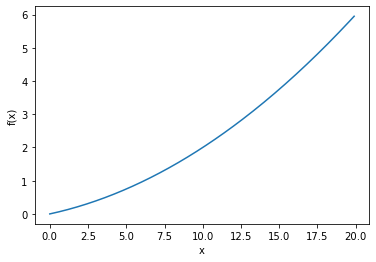

In [23]:
def function_1(x):
    return 0.01*x**2 + 0.1*x 

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

0.1999999999990898


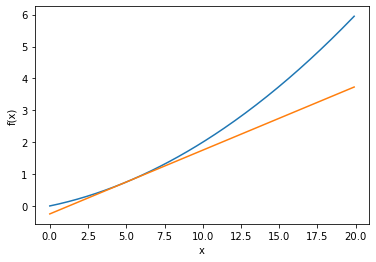

In [24]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 6. 勾配

#### 偏微分
偏微分も同様に計算します．

具体的に以下の関数を用意しておきます．
$$
f(\vec{x}) = \sum_i x_i^2
$$

3次元画像の出力

https://qiita.com/sci_Haru/items/ae54f90e53ccc959d3cb

axisについて

https://vigne-cla.com/16-21/

In [25]:
def function_2(x):
    return x[0]**2 + x[1]**2

def function_2_freedim(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

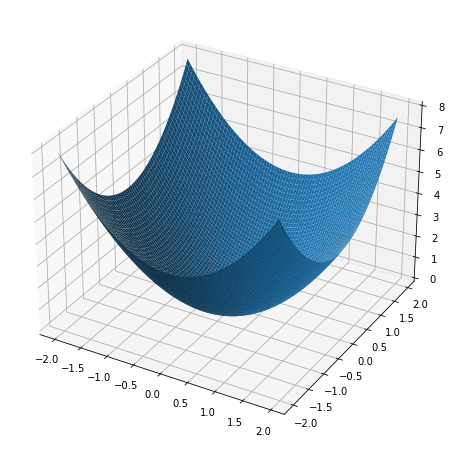

In [26]:
# 画像の出力
from mpl_toolkits.mplot3d import Axes3D   

fig = plt.figure(figsize=(8,8 )) 
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-2, 2, 0.05) # x点として[-2, 2]まで0.05刻みでサンプル
y = np.arange(-2, 2, 0.05)  # y点として[-2, 2]まで0.05刻みでサンプル
x, y = np.meshgrid(x, y)  # 上述のサンプリング点(x,y)を使ったメッシュ生成

z = x**2 + y**2  #-(x^2+y^2 を計算してzz座標へ格納する。

ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0.6) # 曲面のプロット。rstrideとcstrideはステップサイズ，linewidthは曲面のメッシュの線の太さ，をそれぞれ表す。

plt.show() # 絵の出力。

勾配の計算をしていきます．

In [27]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x) # この配列に計算した値を代入していく．
    
    # それぞれの要素ごとに微分を行う．
    for idx in range(x.size):
        # f(x + h)の計算
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)  # f(x+h)
        
        # f(x - h)の計算
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad

In [28]:
# 計算
_numerical_gradient_no_batch(function_2 , np.array([3.0 , 4.0]))

array([6., 8.])

In [29]:
# バッチ学習をする場合，バッチごとに計算をする．

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

勾配を表す図形を表示しましょう

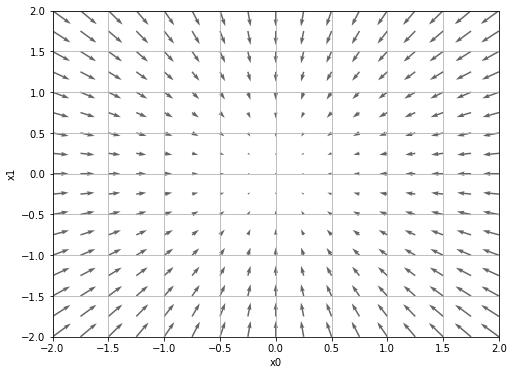

In [30]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]).T).T

plt.figure(figsize=(8,6 ))
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.draw()
plt.show()

## 7.勾配法

パラメータの学習について話を移します．

一番基本的な方法として，勾配降下法があります．

更新式は以下のようになります．
$$
x_0 = x_0 - \alpha \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \alpha \frac{\partial f}{\partial x_1}
$$

$\alpha$は学習率と呼ばれる定数です．

In [31]:
# まずは一度だけ更新してみましょう

lr = 1e-3
init_x = np.array([3.0,-4.0])
x = init_x
x_history = []
x_history.append( x.copy() ) # append配列に要素を追加，もともとあるxの要素を追加

grad = numerical_gradient(function_2, x) # 勾配を計算

lr * grad # 更新式を代入

x -= lr * grad
x

array([ 2.994, -3.992])

In [32]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):# lrが学習率
    x = init_x
    x_history = [] # パラメータ更新の軌跡を保存しておきましょう．

    for i in range(step_num):
        x_history.append( x.copy() ) # append配列に要素を追加，もともとあるxの要素を追加

        grad = numerical_gradient(f, x) # 勾配を計算
        x -= lr * grad # 更新式を代入

    return x, np.array(x_history)

どのようにパラメータが更新されているか図示しましょう

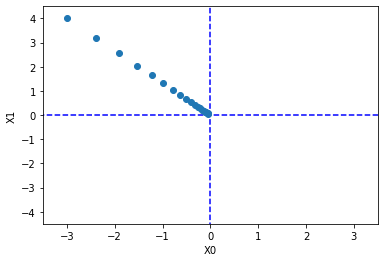

In [33]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

以上で勾配法の説明を終わります．

基本的な学習はこの勾配法で行いますが，『ゼロつく』6章ではさらに学習に対しての効率化や最適化の話があります．

## 8.1層ニューラルネットワークのクラス

ここまででパラメータの更新方法を学んできました．

これを1層ニューラルネットワークへ適用して，実際にニューラルネットワークのパラメータを一度更新しましょう．

#### simpleNetのアーキテクチャ
全結合ニューラルネットワーク

入力2次元

出力3次元

パラメータ数：6

活性化関数：ソフトマックス関数（多クラス分類）

誤差関数：交差エントロピー

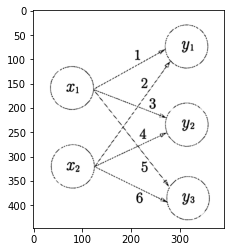

In [34]:
#ちょうど『ゼロつく』の資料としてアーキテクチャを説明する図があったので掲載しておきます．
simplenet = Image.open("simplenet.png")
plt.imshow(np.array(simplenet))

In [35]:
from functions import sigmoid,softmax,sigmoid_grad,cross_entropy_error

class simpleNet:
    def __init__(self):
        np.random.seed(123)
        self.W = np.random.randn(2,3) # パラメータの初期化

    def predict(self, x):
        return np.dot(x, self.W) # モデルの作成

    def loss(self, x, t): # 活性化関数ソフトマックス，誤差関数交差エントロピー
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

ニューラルネットワークの学習における勾配の計算については，詳しくは5章でやります．（誤差逆伝搬法）

ここでは勉強した勾配を素直に使います．

In [36]:
x = np.array([0.6, 0.9]) # 入力
t = np.array([0, 0, 1]) # 教師データ

net = simpleNet() # 作成したクラスからオブジェクト化

f = lambda w: net.loss(x, t) # 順伝播
net.W

array([[-1.0856306 ,  0.99734545,  0.2829785 ],
       [-1.50629471, -0.57860025,  1.65143654]])

In [37]:
dW = numerical_gradient(f, net.W) # 勾配を取る

print(dW)

[[ 0.01249344  0.10047557 -0.11296902]
 [ 0.01874017  0.15071336 -0.16945353]]


パラメータが

$$
\begin{pmatrix}
0.01243944 & 0.10047557 & -0.11296902 \\
0.01874017 & 0.15071336 & -0.16945353 \\
\end{pmatrix}
= 
\begin{pmatrix}
-1.0856306 &0.99734545 &0.2829785 \\
-1.50629471 & -0.57860025 & 1.65143654 \\
\end{pmatrix}
- \alpha \frac{\partial E(W)}{\partial W}
$$

という具合に更新されたことがわかります．

この更新を繰り返すことで，パラメータが最適化されていきます．

lambda表記について

https://note.nkmk.me/python-lambda-usage/

## 9.2層ニューラルネットワークのクラス

2層ニューラルネットワークを用いて，MNISTデータからパラメータを最適化していきましょう．

#### TwoLayerNetのアーキテクチャ
全結合ニューラルネットワーク

入力：任意の次元(input_size)

中間：任意の次元(hidden_size)

出力：任意の次元(output_size)

パラメータ数：input_size * hidden_size + hidden_size + hidden_size * output_size

中間層活性化関数：シグモイド関数

出力層活性化関数：ソフトマックス関数（多クラス分類）

誤差関数：交差エントロピー

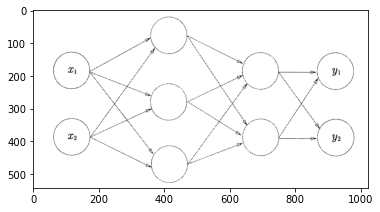

In [38]:
TwoNetimg = Image.open("Twonet.png")
plt.imshow(np.array(TwoNetimg))

In [39]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        np.random.seed(123) # 乱数固定
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        # モデルの構築
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1) # 隠れ層の活性化関数
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2) # 出力層の活性化関数
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        # 損失関数は交差エントロピーを用いる
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        # パラメータ更新のための勾配計算
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        # 順伝播の計算
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        # 逆伝搬の計算(詳しくは５章)
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads


## 10.ミニバッチ学習の実装

In [40]:
%%time
# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) # 24×24ピクセル，隠れ層50

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 学習の記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.8002833333333333, 0.8056
train acc, test acc | 0.8807833333333334, 0.8855
train acc, test acc | 0.9008666666666667, 0.9045
train acc, test acc | 0.9097166666666666, 0.9124
train acc, test acc | 0.9157833333333333, 0.9182
train acc, test acc | 0.9202, 0.9225
train acc, test acc | 0.9246166666666666, 0.9269
train acc, test acc | 0.9287166666666666, 0.9293
train acc, test acc | 0.93145, 0.9323
train acc, test acc | 0.9345, 0.9341
train acc, test acc | 0.93785, 0.9379
train acc, test acc | 0.94, 0.9399
train acc, test acc | 0.9425, 0.9411
train acc, test acc | 0.9446666666666667, 0.9435
train acc, test acc | 0.9457, 0.9445
train acc, test acc | 0.94765, 0.9454
CPU times: total: 1min 39s
Wall time: 23.9 s


正解率の推移についてグラフを見てみましょう

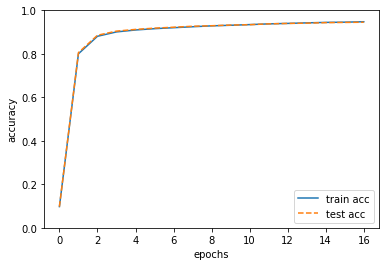

In [41]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [42]:
train_loss_list[0] # 最初の訓練誤差

2.2947917925330343

訓練データの推移についても見てみましょう．

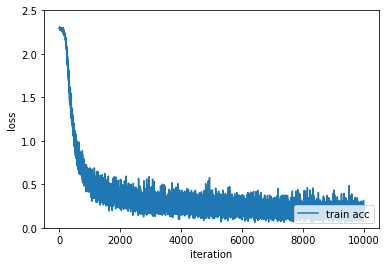

In [43]:
# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend(loc='lower right')
plt.show()


気になるのは，2000回前後でパラメータの更新がほぼ止まっていることです．

つまり，それ以降の学習は無駄になっているようにも見えます．

このようなことに対する対処も6章で学べます．

## 参考：11.scikit-learnによる実装

最後に，参考としてニューラルネットワークをライブラリを使って実装してみましょう．

sklearnの公式サイト

https://scikit-learn.org/stable/modules/preprocessing.html

その他参考にしたサイト

https://qiita.com/tsal3290s/items/3c0b8713a26ee10b689e

https://qiita.com/propella/items/ca4e577dcaf311273157

https://spjai.com/neural-network-parameter/

In [44]:
import sklearn
from sklearn import datasets # MNISTデータを取得するため
from sklearn.model_selection import train_test_split # 訓練データとテストデータを分ける
from sklearn.neural_network import MLPClassifier # ニューラルネットワークのモデル実装のため

sklearnからデータセットも取得します．

In [45]:
%time X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

CPU times: total: 1min 4s
Wall time: 1min 32s


取得したデータを確認してみましょう．

In [46]:
# 取得したデータの確認
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [47]:
X# データフレームオブジェクトで入っている

# 横×縦：70000枚の画像データ×画像の詳細で縦横28ピクセルずつ

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y # Seriesオブジェクトで入っている

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [49]:
X.iloc[0,0:] 

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [50]:
a = X.iloc[0,0:].values # numpyのarray配列に変換

In [51]:
a # 1元配列

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [52]:
a.reshape(28,28) # 画像出力のため２次元配列に

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

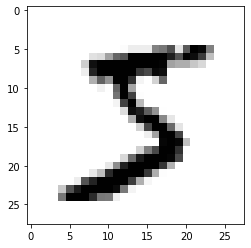

In [53]:
# 一番最初の5の画像を見てみましょう
plt.imshow(a.reshape(28,28), cmap=plt.cm.gray_r)

In [54]:
b = X.iloc[4,0:].values

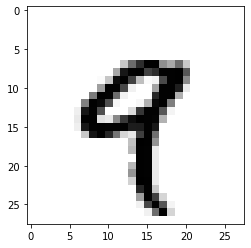

In [55]:
# 4番目の9の画像を見てみましょう
plt.imshow(b.reshape(28,28), cmap=plt.cm.gray_r)

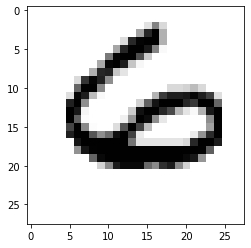

In [56]:
# 怪しい画像を探してみましょう

c = X.iloc[3767,0:].values
plt.imshow(c.reshape(28,28), cmap=plt.cm.gray_r)

In [57]:
# 正解は6みたいです
y.iloc[3767]

'6'

ニューラルネットワークでモデル化し，推定してみましょう

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X / 255, # ピクセル値が 0 - 1 になるようにする
                                                        y.astype('int64'), # 正解データを数値にする
                                                        stratify = y,
                                                        random_state=0)

In [59]:
def sklearn_mlp(): # mlp:multilayer perceptron(多層パーセプトロン)
    clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, verbose=bool, random_state=0)
    clf.fit(X_train, y_train)
    print('accuracy_score: %.3f' % clf.score(X_test, y_test))
# 引数について:
# activation:活性化関数
# solver:最適化手法(6章で詳しく)  
# alpha:正則化項の学習率
# max_iter:学習の反復最大回数

%time sklearn_mlp()

Iteration 1, loss = 0.45233182
Iteration 2, loss = 0.20979114
Iteration 3, loss = 0.15874225
Iteration 4, loss = 0.12889054
Iteration 5, loss = 0.10727955
Iteration 6, loss = 0.09205166
Iteration 7, loss = 0.07950346
Iteration 8, loss = 0.07020121
Iteration 9, loss = 0.06217822
Iteration 10, loss = 0.05465570
Iteration 11, loss = 0.04819310
Iteration 12, loss = 0.04333545
Iteration 13, loss = 0.03868654
Iteration 14, loss = 0.03423226
Iteration 15, loss = 0.03061087
Iteration 16, loss = 0.02744497
Iteration 17, loss = 0.02449893
Iteration 18, loss = 0.02202319
Iteration 19, loss = 0.01999112
Iteration 20, loss = 0.01744281
accuracy_score: 0.977
CPU times: total: 2min 1s
Wall time: 28 s


C:\Users\h20s1\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


テストデータに対して97パーセントの正解率を出しています．だいぶ良いです．

引数についてさらに詳しく知りたい場合は，以下の公式サイトを参照してください．

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html